In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
# Dynamic width of the notebook itself.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Read the data

In [70]:
df = pd.read_csv('results_acorn.csv')#("all_results.csv")
df["notes"] = df["notes"].fillna("")
df.head()

,#phase_layers,#cnots_per_layer,idx,mode,file,CX depth,# CX,Rz depth,# Rz,time,Original CX depth,Original # CX,Original Rz depth,Original # Rz,notes
0,5,50,0,steiner,circuits/phasepoly/test/20qubits/5layers50cnot...,821,1982,5,92,0 days 00:01:08.713506000,68,250,5,100,
1,5,50,1,steiner,circuits/phasepoly/test/20qubits/5layers50cnot...,799,1918,5,90,0 days 00:00:51.516941000,73,250,5,100,
2,5,50,2,steiner,circuits/phasepoly/test/20qubits/5layers50cnot...,757,1852,5,95,0 days 00:01:05.134878000,66,250,5,100,
3,5,50,3,steiner,circuits/phasepoly/test/20qubits/5layers50cnot...,787,1853,5,89,0 days 00:00:48.822204000,66,250,5,100,
4,5,50,4,steiner,circuits/phasepoly/test/20qubits/5layers50cnot...,826,1969,5,89,0 days 00:00:55.379556000,70,250,5,100,


In [71]:
df.time = pd.to_timedelta(df.time).apply(lambda x: x.total_seconds())
df.time = pd.to_timedelta(df.time).apply(lambda x: x.total_seconds())
df.dtypes

#phase_layers          int64
#cnots_per_layer       int64
idx                    int64
mode                  object
file                  object
CX depth               int64
# CX                   int64
Rz depth               int64
# Rz                   int64
time                 float64
Original CX depth      int64
Original # CX          int64
Original Rz depth      int64
Original # Rz          int64
notes                 object
dtype: object

# Filter the data

In [6]:
df = df[(df["mode"] == "tket") | df["notes"].isin([
                                              "Partition (not parity) ordering, only initial tket placement, parity permutation", # Good in almost every situation
                                              #"Partition (not parity) ordering, only initial tket placement", # Much worse than the other options
                                              "Partition and parity ordering, only initial tket placement", # Slightly better than iterative placement
                                              #"Partition (not parity) ordering, iterative tket placement", # Much worse than the other options
                                              #"Partition (not parity) ordering, iterative tket placement, parity permutation", # Good for single layer, but worse in multilayer
                                              #"Partition and parity ordering, iterative tket placement", # Slightly worse than only initial placement
                                              #"Partition and parity ordering, iterative tket placement, parity permutation" # Good for single layer, but horrible in multilayer
                                                "Partition (not parity) ordering, iterative initial tket placement2, parity permutation", # Does not improve - optimizing gauss does not optimize steiner-gauss it seems.
                                                "tket->steiner3", # tket->steiner/tket->steiner2 has wrong implementation
                                                "phase_poly->tket",
                                                ""
                                                  ])]

# Visualize the data

In [68]:
# Parameters
phase_layers = [1,3,5,10]
label = "# CX"
figure_size = (20,60)

<IPython.core.display.Javascript object>


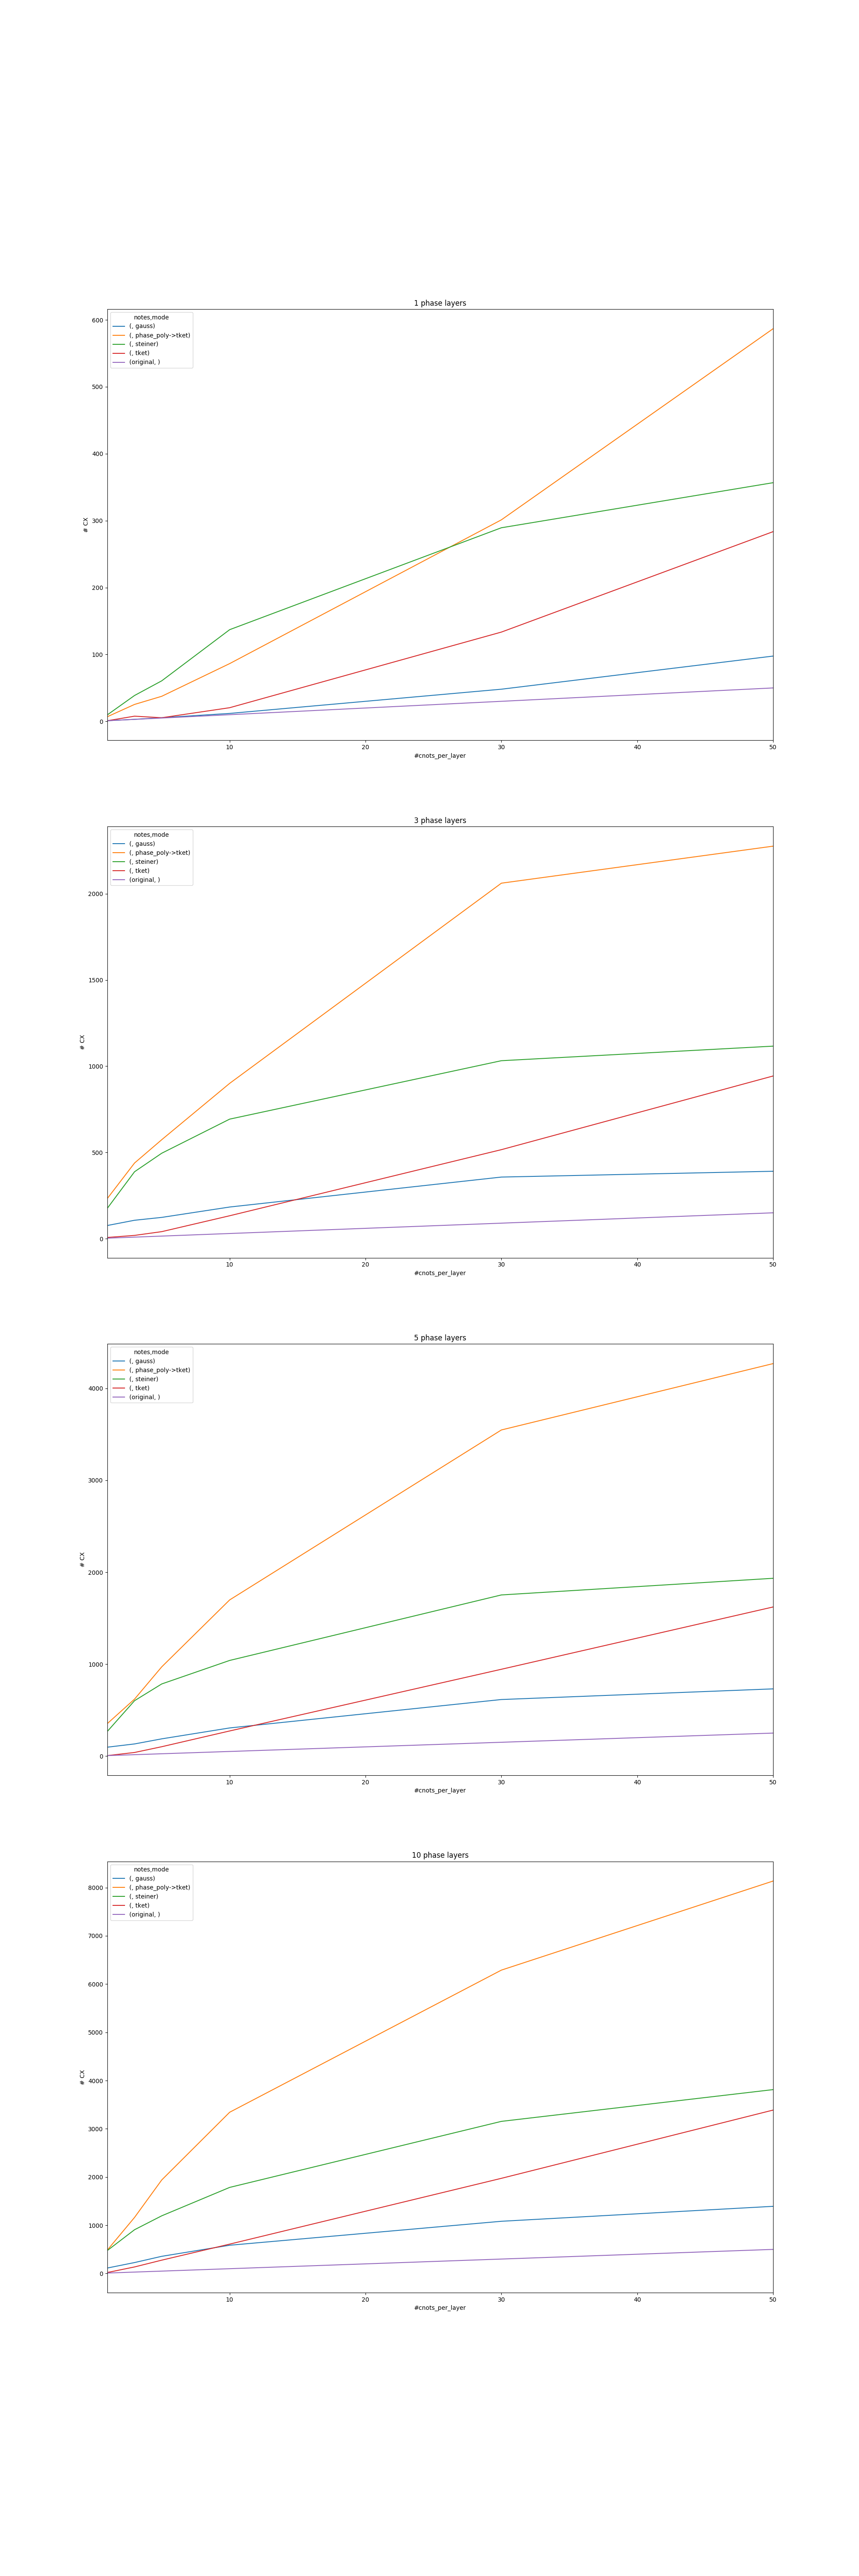

In [72]:
fig, ax = plt.subplots(len(phase_layers), 1, figsize=figure_size)
for i, phase in enumerate(phase_layers):
    temp_df = df[(df["mode"].isin(["steiner", "gauss", "phase_poly->tket", "tket"])) & (df["#phase_layers"]==phase)].groupby(["#cnots_per_layer", "mode", "notes"]).mean()[label].unstack().unstack().dropna(1)
    if label == "# CX":
        temp_df["original"] = temp_df.index*phase
    temp_df.plot(ax=ax[i])
    ax[i].title.set_text(str(phase)+' phase layers')
    ax[i].set_ylabel(label)
fig.show()
fig.savefig("Results test.png")

# Replicate Nash et al. figures

In [7]:
def plot_varying_circuit_size(file):
    df = pd.read_csv(file)
    df1 = df[df["mode"]=="steiner"]
    df2 = df[df["mode"]=="phase_poly->tket"]
    df3 = df[df["mode"]=="gauss"]
    df1.set_index("file", inplace=True)
    df2.set_index("file", inplace=True)
    df3.set_index("file", inplace=True)
    overhead = (df2["# CX"] - df1["# CX"])/df2["# CX"]*100
    plt.clf()
    plt.xlabel("# CNOTs before routing (gauss)")
    plt.ylabel("% CNOT overhead compared to phasepoly->tket")
    plt.scatter(df3["# CX"], overhead)

In [16]:
plt.xlabel("# CNOTs before routing")
plt.ylabel("% CNOT overhead compared to phasepoly->tket")
plot_varying_circuit_size("results_acorn.csv")

<IPython.core.display.Javascript object>


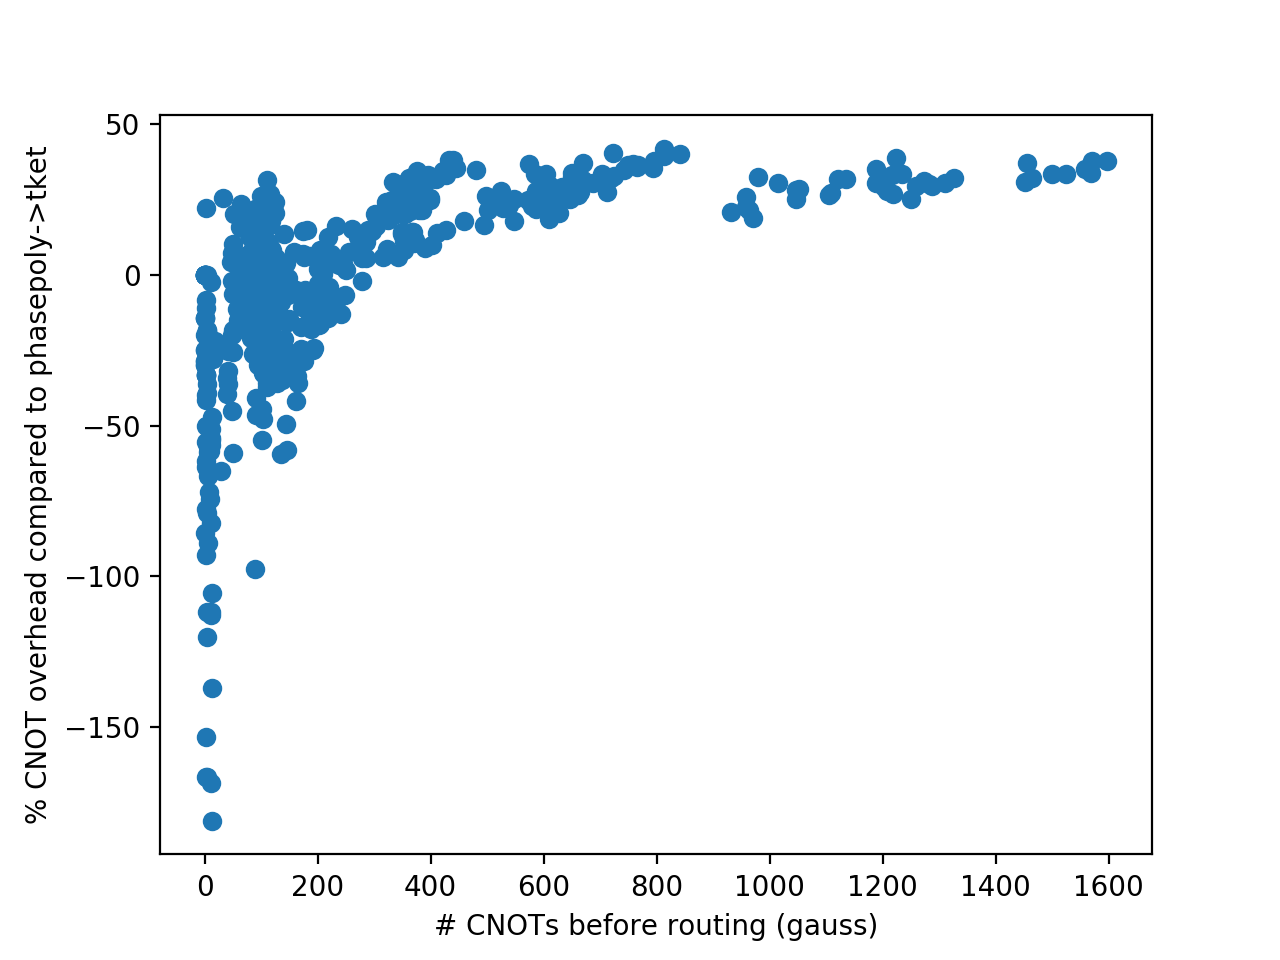

In [8]:
plt.xlabel("# CNOTs before routing")
plt.ylabel("% CNOT overhead compared to phasepoly->tket")
plot_varying_circuit_size("results_tokyo3.csv")

# Misc and scratch pad

In [41]:
set(df["mode"].tolist())

{'gauss', 'phase_poly->tket', 'steiner'}

In [9]:
df[df["mode"] != "steiner"][df["#phase_layers"]==phase].groupby(["#cnots_per_layer", "mode", "notes"]).max()[label].unstack().unstack().dropna(1)

/Users/ariannemeijer/miniconda3/envs/steinerenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


notes,"No ordering, iterative tket placement","Partition (not parity) ordering, iterative initial tket placement2, parity permutation","Partition (not parity) ordering, only initial tket placement, parity permutation","Partition and parity ordering, only initial tket placement",phase_poly->tket,tket->steiner3
mode,tket,tket-steiner,tket-steiner,tket-steiner,phase_poly->tket,tket->steiner
#cnots_per_layer,,,,,,
1,12.05,63.05,27.15,30.80,79.00,22.70
2,26.60,86.75,69.95,72.55,124.00,57.75
3,40.60,116.90,102.25,111.55,162.30,82.05
5,66.65,171.20,169.95,169.20,231.90,153.40
10,133.50,238.15,237.65,247.90,322.25,299.40
20,280.20,315.60,306.30,324.90,439.40,525.95
30,407.65,332.95,325.15,348.60,481.75,613.40
40,540.80,351.20,358.90,377.15,500.30,665.10


In [59]:
df[(df["mode"].isin(["steiner", "gauss", "phase_poly->tket"])) & (df["#phase_layers"]==1)].groupby(["#cnots_per_layer", "mode","notes"]).mean()["# CX"].unstack().unstack().dropna(1).index*4

Int64Index([4, 12, 20, 40, 120, 200], dtype='int64', name='#cnots_per_layer')